In [1]:
import numpy as np
from scipy import linalg as la
import matplotlib.pyplot as plt
from expint import *
from RK import *
from ac import AllenCahn

# Test convergence order

The following test system is used:

$$ y_j'(t) = (L\mathbf{y}(t))_j + \sin(t)y_j(t)^2 $$

where $L$ is a randomly constructed matrix.

In [2]:
methods = [LawsonEuler, NorsettEuler, ExpMidpoint, ExpTrapezoid, ETDRK4]
m = 5 # dimension
np.random.seed(20180504)
L = np.random.rand(m,m) - 0.5
N = lambda t, y: np.sin(t)*y**2
y0 = np.random.rand(m) - 0.5
t_span = (0.0, 2.0)

In [3]:
dt = 1e-5
yref = solve_semilinear(L, N, t_span, y0, dt, method=RK4)[1][-1,:]

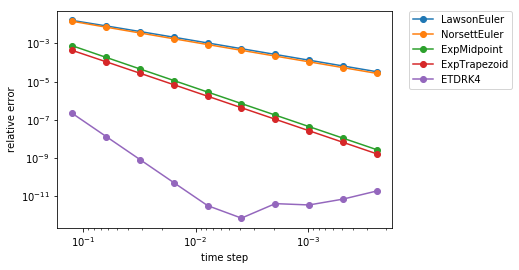

In [4]:
dts = np.logspace(-3, -12, num=10, base=2.0)
for method in methods:
    errs = np.zeros(len(dts))
    for i in range(len(dts)):
        y = solve_semilinear(L, N, t_span, y0, dts[i], method)[1][-1,:]
        errs[i] = la.norm(y - yref) / la.norm(yref)
    plt.plot(dts, errs, '-o', label=method.__name__)
plt.xlabel('time step')
plt.ylabel('relative error')
plt.loglog()
plt.xlim(plt.xlim()[1], plt.xlim()[0]) # revert x axis
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

# Numerical stability of the phi functions

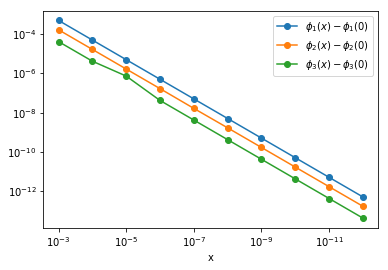

In [5]:
from expint import _phi1, _phi2, _phi3
xs = np.logspace(-3, -12, 10)
res1 = np.abs(_phi1(xs) - 1.0)
res2 = np.abs(_phi2(xs) - 0.5)
res3 = np.abs(_phi3(xs) - 1/6)

plt.plot(xs, res1, '-o', label=r'$\phi_1(x) - \phi_1(0)$')
plt.plot(xs, res2, '-o', label=r'$\phi_2(x) - \phi_2(0)$')
plt.plot(xs, res3, '-o', label=r'$\phi_3(x) - \phi_3(0)$')
plt.legend()
plt.loglog()
plt.xlim(plt.xlim()[1], plt.xlim()[0]) # revert axis
plt.xlabel('x');

# Example: Solving the Allen-Cahn equation

In [37]:
m = 999 # number of internal nodes
R = 20.0
D = 0.1
L, N, X = AllenCahn(m, R, D)
y0 = np.zeros(m)
y0[m//4] = 1.0; y0[m*3//4] = -1.0
t_span = (0.0, 10.0)

In [38]:
def solve_and_plot(dt, method):
    _, ys = solve_semilinear(L, N, t_span, y0, dt, method)
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    plt.plot(X, ys[0,:])
    plt.xlabel('x')
    plt.ylabel('u')
    plt.title("{}, dt = {}, T = 0.0".format(method.__name__, dt))
    plt.subplot(1,2,2)
    plt.plot(X, ys[-1,:])
    plt.xlabel('x')
    plt.ylabel('u')
    plt.title("{}, dt = {}, T = 10.0".format(method.__name__, dt))

The RK4 method can only handle small time steps:

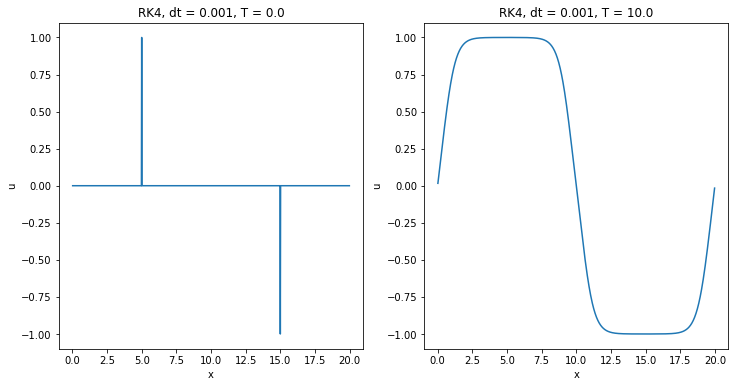

In [40]:
solve_and_plot(1e-3, RK4)

C:\Users\MSeeker\Desktop\Num2\num2-spring2018\src\ac.py:19: RuntimeWarning: overflow encountered in power
  N = lambda t, u: -u**3


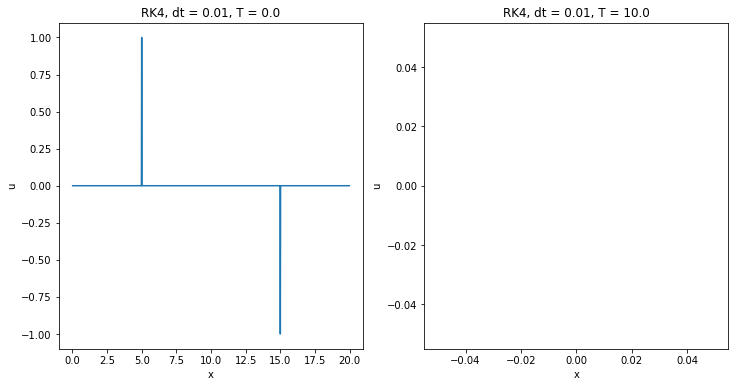

In [41]:
solve_and_plot(1e-2, RK4)

The exponential integrator ETDRK4, on the other hand, is stable for large time steps:

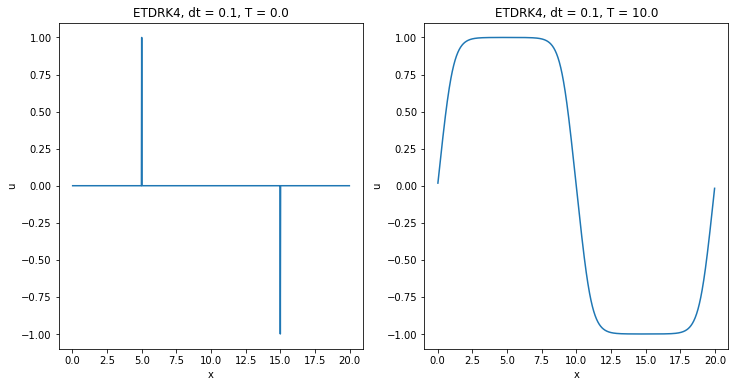

In [42]:
solve_and_plot(0.1, ETDRK4)

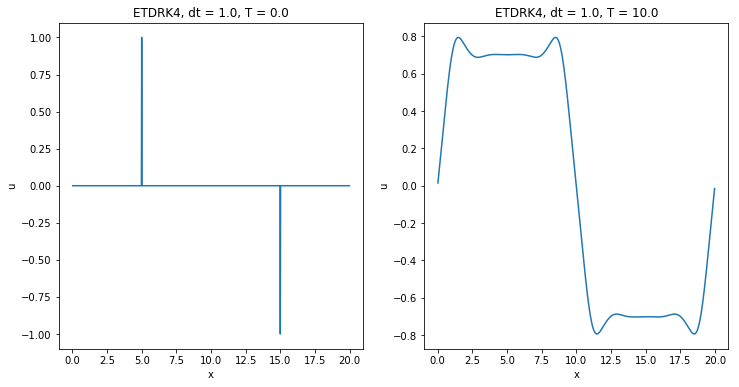

In [43]:
solve_and_plot(1.0, ETDRK4) # inaccurate but still stable